In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
BASE_PATH = '/root/work/datasets/artwork_sequence/'
CONFIGURATION_PATH = '/root/work/artwork_sequence/'

## Map tours to unique id

In [ ]:
folders_dict = {}
index = 0
#List museums
for folder in os.listdir(BASE_PATH):
    museum_path = os.path.join(BASE_PATH, folder)
    #List tours inside the museum
    for tour_folder in os.listdir(museum_path):
        #skip .ipynb checkpoint folder
        if not tour_folder.startswith('.'):
        
            tour_path = os.path.join(museum_path, tour_folder)
            folders_dict[index] = tour_path
            index +=1

print(len(folders_dict))

**Put data into a Dataframe**

In [ ]:
df_tours = pd.DataFrame.from_dict(folders_dict, orient='index', columns=['tour_path'])
df_tours.head()

## Train Test split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_tours
y = [1]*len(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Save train test data configuration**

In [ ]:
df_tours['train_test'] = 'Train'
df_tours.loc[X_test.index, 'train_test'] = 'Test'
df_tours.head(10)

In [ ]:
config_folder = os.path.join(CONFIGURATION_PATH, 'train_test_configuration/config_0')
if not os.path.exists(config_folder):
    os.makedirs(config_folder)

In [ ]:
df_tours.to_csv(os.path.join(config_folder, 'config.csv'), index=False)

#Because the training and testing data is shuffled
X_train.to_csv(os.path.join(config_folder, 'X_train.csv'), index=True)
X_test.to_csv(os.path.join(config_folder, 'X_test.csv'), index=True)

**Save train and test code matrix**

In [ ]:
def get_code_matrix(X):
    X_list = []
    for path in X.values:
        matrix_path = os.path.join(path[0], 'code_matrix.npy')
        code_matrix = np.load(matrix_path)
        X_list.append(code_matrix)

    X_matrix = np.concatenate(X_list)    
    return X_matrix

In [ ]:
#X_train_matrix
X_train_matrix = get_code_matrix(X_train)
X_train_matrix.shape

In [ ]:
#X_test_matrix
X_test_matrix = get_code_matrix(X_test)
X_test_matrix.shape

In [ ]:
np.save(os.path.join(config_folder, 'X_train_matrix' ), X_train_matrix)
np.save(os.path.join(config_folder, 'X_test_matrix' ), X_test_matrix)

## Merge all data from the tours

In [3]:
metadata_list = []
index = 0
#List museums
for folder in os.listdir(BASE_PATH):
    museum_path = os.path.join(BASE_PATH, folder)
    #List tours inside the museum
    if os.path.isdir(museum_path):
        for tour_folder in os.listdir(museum_path):
            #skip .ipynb checkpoint folder
            if not tour_folder.startswith('.'):
                tour_path = os.path.join(museum_path, tour_folder)
                #Get metadata
                df = pd.read_csv(os.path.join(tour_path, 'metadata.csv'))
                df['tour_path'] = tour_path
                metadata_list.append(df)

print(len(metadata_list))


52


**Tour length mean**

In [4]:
length_tours = []
for df in metadata_list:
    length_tours.append(df.shape[0])
np.mean(length_tours)

16.51923076923077

In [20]:
PLOT_PATH = '/root/work/artwork_sequence/plots'

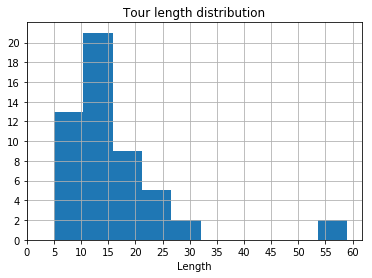

In [22]:
import matplotlib.pyplot as plt

plot = pd.Series(length_tours).hist()
plt.title('Tour length distribution')
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 22, 2))
plt.xlabel('Length')
plt.savefig(os.path.join(PLOT_PATH, 'tour_length_hist.png'))

**Merge unique artworks**

In [23]:
all_metadata = pd.concat(metadata_list)
all_metadata.head()

,id,author,data,image_url,title,tour_path
0,1,n.v. haagsche plateelfabriek rozenburg,1914,https://lh3.googleusercontent.com/IJn7rB4WvYvv...,vaas beschilderd met paarse seringen en op een...,/root/work/datasets/artwork_sequence/rijksmuse...
1,2,n.v. haagsche plateelfabriek rozenburg,1900,https://lh3.googleusercontent.com/l0ccWh5aCgP5...,vaas,/root/work/datasets/artwork_sequence/rijksmuse...
2,3,n.v. haagsche plateelfabriek rozenburg,1900,https://lh3.googleusercontent.com/uNQWFg-BhiPZ...,vase with lily decoration,/root/work/datasets/artwork_sequence/rijksmuse...
3,4,n.v. haagsche plateelfabriek rozenburg,1902,https://lh3.googleusercontent.com/QRdRjQDGyvDp...,vaas beschilderd met takken met seringen en ee...,/root/work/datasets/artwork_sequence/rijksmuse...
4,5,n.v. haagsche plateelfabriek rozenburg,1914,https://lh3.googleusercontent.com/aVqlVZ6B8oqc...,vaas beschilderd met paarse seringen en op een...,/root/work/datasets/artwork_sequence/rijksmuse...


In [24]:
all_metadata.shape

(859, 6)

In [25]:
all_metadata = all_metadata.drop_duplicates(subset=['author', 'title'])
all_metadata.head()

,id,author,data,image_url,title,tour_path
0,1,n.v. haagsche plateelfabriek rozenburg,1914,https://lh3.googleusercontent.com/IJn7rB4WvYvv...,vaas beschilderd met paarse seringen en op een...,/root/work/datasets/artwork_sequence/rijksmuse...
1,2,n.v. haagsche plateelfabriek rozenburg,1900,https://lh3.googleusercontent.com/l0ccWh5aCgP5...,vaas,/root/work/datasets/artwork_sequence/rijksmuse...
2,3,n.v. haagsche plateelfabriek rozenburg,1900,https://lh3.googleusercontent.com/uNQWFg-BhiPZ...,vase with lily decoration,/root/work/datasets/artwork_sequence/rijksmuse...
3,4,n.v. haagsche plateelfabriek rozenburg,1902,https://lh3.googleusercontent.com/QRdRjQDGyvDp...,vaas beschilderd met takken met seringen en ee...,/root/work/datasets/artwork_sequence/rijksmuse...
5,6,theo colenbrander,1886,https://lh3.googleusercontent.com/TZqVQVxb-1kl...,garniture of five vases,/root/work/datasets/artwork_sequence/rijksmuse...


In [35]:
all_metadata['tour_path'].iloc[0]

'/root/work/datasets/artwork_sequence/rijksmuseum_crawler/tour_21'

In [26]:
all_metadata.shape

(633, 6)

In [ ]:
all_metadata.to_csv(os.path.join(BASE_PATH, 'all_metadata.csv'), index=False)